# Modeling IMDB Dataset with Linear Regression

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Libraries" data-toc-modified-id="Import-Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Libraries</a></span></li><li><span><a href="#Load-and-Inspect-Dataset" data-toc-modified-id="Load-and-Inspect-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load and Inspect Dataset</a></span><ul class="toc-item"><li><span><a href="#Adding-Categorical-Variables/Features-To-The-Dataset" data-toc-modified-id="Adding-Categorical-Variables/Features-To-The-Dataset-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Adding Categorical Variables/Features To The Dataset</a></span></li><li><span><a href="#Target-Distribution" data-toc-modified-id="Target-Distribution-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Target Distribution</a></span></li><li><span><a href="#Feature-distributions" data-toc-modified-id="Feature-distributions-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Feature distributions</a></span></li><li><span><a href="#Feature-Selection-for-Modeling" data-toc-modified-id="Feature-Selection-for-Modeling-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Feature Selection for Modeling</a></span></li><li><span><a href="#Generating-train/test/validation-dataset" data-toc-modified-id="Generating-train/test/validation-dataset-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Generating train/test/validation dataset</a></span></li><li><span><a href="#Standardize-features" data-toc-modified-id="Standardize-features-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Standardize features</a></span></li></ul></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#Linear-and-Ridge-Regression" data-toc-modified-id="Linear-and-Ridge-Regression-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Linear and Ridge Regression</a></span></li><li><span><a href="#Categorical-data" data-toc-modified-id="Categorical-data-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Categorical data</a></span></li><li><span><a href="#Cross-validation" data-toc-modified-id="Cross-validation-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Cross-validation</a></span></li><li><span><a href="#Tuning-regularization-strength" data-toc-modified-id="Tuning-regularization-strength-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Tuning regularization strength</a></span></li><li><span><a href="#Factors-that-may-have-contributed-to-this-inaccuracy-in-the-model:" data-toc-modified-id="Factors-that-may-have-contributed-to-this-inaccuracy-in-the-model:-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Factors that may have contributed to this inaccuracy in the model:</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

## Import Libraries

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
import requests
from sklearn.pipeline import Pipeline
from time import sleep
from random import randint
import scipy.stats as stats
from matplotlib.ticker import FormatStrFormatter
from sklearn.model_selection import KFold
from IPython.display import Image

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Setting pandas precision

pd.set_option('precision', 2)

## Load and Inspect Dataset

In [3]:
movie_dataframes=pd.read_csv('.../movie_dataframe_completemovies_clean.csv')
movie_dataframes=movie_dataframes.drop(columns='Unnamed: 0')
movie_dataframes.head()

,movie_id,movie,year,imdb,metascore,votes,lengths,ratings,genres,budget,language,country,cumulative_worldwide_gross
0,8579674,1917,2019,8.6,79,64668,119,R,"Drama, War",100000000,"['English', 'French', 'German']","['UK', 'USA']",143336984
1,2527338,Star Wars: Episode IX - The Rise of Skywalker,2019,6.9,54,233251,142,PG-13,"Action, Adventure, Fantasy",200000000,['English'],['USA'],1028754801
2,7131622,Once Upon a Time... in Hollywood,2019,7.8,83,341435,161,R,"Comedy, Drama",90000000,"['English', 'Italian', 'Spanish']","['USA', 'UK', 'China']",373058543
3,7286456,Joker,2019,8.6,59,618468,122,R,"Crime, Drama, Thriller",55000000,['English'],"['Canada', 'USA']",1069147201
4,8946378,Knives Out,2019,8.1,82,122999,131,PG-13,"Comedy, Crime, Drama",40000000,"['English', 'Spanish']",['USA'],277992387


__Checking the data types in the dataframe:__

In [4]:
movie_dataframes.dtypes

movie_id                        int64
movie                          object
year                            int64
imdb                          float64
metascore                       int64
votes                           int64
lengths                         int64
ratings                        object
genres                         object
budget                          int64
language                       object
country                        object
cumulative_worldwide_gross      int64
dtype: object

__Checking for any null values:__

In [5]:
movie_dataframes.isnull().sum()

movie_id                      0
movie                         0
year                          0
imdb                          0
metascore                     0
votes                         0
lengths                       0
ratings                       0
genres                        0
budget                        0
language                      0
country                       0
cumulative_worldwide_gross    0
dtype: int64

There are no null values!

### Adding Categorical Variables/Features To The Dataset

__Unique values in 'ratings' column:__

In [6]:
movie_dataframes['ratings'].unique()

array(['R', 'PG-13', 'PG', 'Unrated', 'G', 'Not Rated', 'TV-MA'],
      dtype=object)

__Creating a dictionary based on "ratings" column:__

In [7]:
ratings_list = {'R':'Adult Movies',
                'PG-13':'Family Movies-Parental Guidance',
                'PG':'Family Movies-Parental Guidance',
                'Unrated':'Unrated Movies',
                'G':'Family Movies',
                'Not Rated':'Unrated Movies',
                'TV-MA':'Adult Movies'}

__Mapping movie ratings in the newly created column, "movie_type":__

In [8]:
movie_dataframes['movie_type']=movie_dataframes['ratings'].map(ratings_list)

__Selecting a partial dataset to show the correlation between them:__

In [9]:
selected_movies_dataframes= movie_dataframes.loc[:,['year','lengths','budget','cumulative_worldwide_gross']]

__Checking if there are any null values:__

In [10]:
selected_movies_dataframes.isna().sum()

year                          0
lengths                       0
budget                        0
cumulative_worldwide_gross    0
dtype: int64

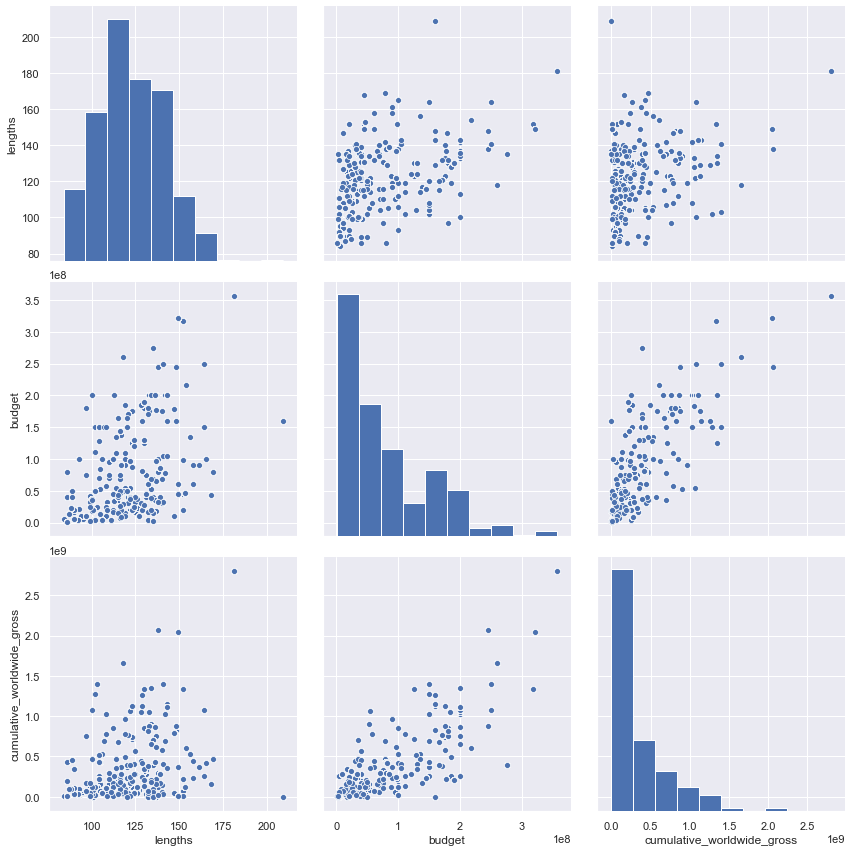

<Figure size 864x864 with 0 Axes>

In [123]:
"""
Pairplot to show the correlation between different features in the dataset 
and the target variable, "cumulative_worldwide_gross". This is important step in finding out possible candidates for feature engineering.
"""

sns_plot = sns.pairplot(selected_movies_dataframes, size=4.0)
sns_plot.savefig("pairplot.png")

plt.clf() 
Image(filename='pairplot.png') 

In [11]:
selected_movies_dataframes= movie_dataframes.loc[:,['lengths','budget','cumulative_worldwide_gross']]

### Target Distribution

In [12]:
target = stats.boxcox_normmax(movie_dataframes.cumulative_worldwide_gross, brack=(-4, 4))
movie_dataframes['cumulative_worldwide_gross_norm'] = stats.boxcox(movie_dataframes.cumulative_worldwide_gross, target)

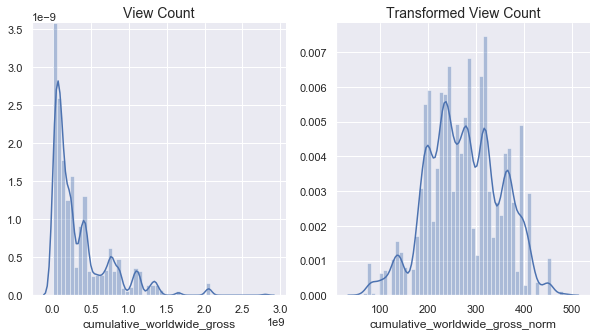

In [13]:
plt.subplots(2, 2, figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.distplot(movie_dataframes.cumulative_worldwide_gross)
plt.title('View Count', size=14)
sns.despine()
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
plt.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
plt.subplot(1, 2, 2)
sns.distplot(movie_dataframes.cumulative_worldwide_gross_norm)
plt.title('Transformed View Count', size=14)
sns.despine()

__Exploring the correlations across the selected columns:__

In [14]:
selected_movies_dataframes.corr()

,lengths,budget,cumulative_worldwide_gross
lengths,1.00,0.39,0.31
budget,0.39,1.00,0.78
cumulative_worldwide_gross,0.31,0.78,1.00


### Feature distributions

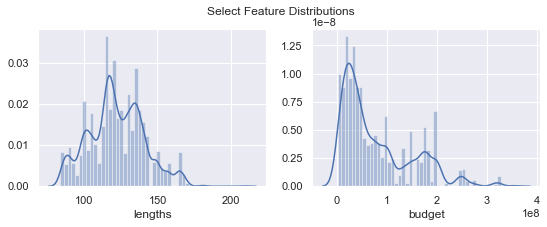

In [15]:
fig, axs = plt.subplots(figsize=(9, 3))

plt.subplot(1, 2, 1)
sns.distplot(movie_dataframes.lengths)
plt.subplot(1, 2, 2)
sns.distplot(movie_dataframes.budget)
ax = plt.subplot(1, 2, 2)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
plt.suptitle('Select Feature Distributions')
plt.gcf().subplots_adjust(bottom=0.15)

### Feature Selection for Modeling

__Heatmap of correlations:__

(3.0, 0.0)

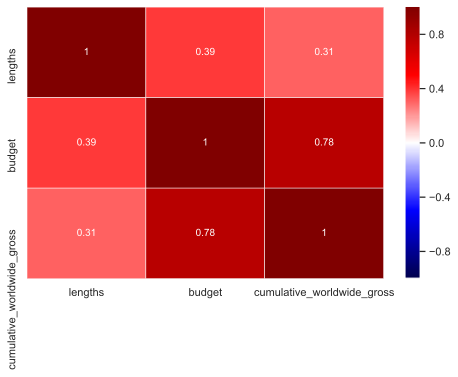

In [16]:
%config InlineBackend.figure_format = 'svg'
plt.figure(figsize=(8,5))
ax=sns.heatmap(selected_movies_dataframes.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1,linewidths=0.5);
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

We expect that movie lengths and budget will play an important role in predicting the cumulative worldwide gross. Here, factors such as IMDB rating and votes are received after the movies are released and hence would not influence the cumulative worldwide gross.

### Generating train/test/validation dataset 

In [17]:
# Generating the train/validation/test datasets
# We exclude "imdb", "metascore", and "votes" since these are the not part of the predictor for revenue generated by the movie

X = selected_movies_dataframes.loc[:,['lengths','budget']];
y = selected_movies_dataframes['cumulative_worldwide_gross'];

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)

### Standardize features

In [18]:
std = StandardScaler()
std.fit(X_train)
X_tr = std.transform(X_train)

## Modeling

### Linear and Ridge Regression

In [19]:
# Performing linear regression on the above training dataset to get the r-squared and the adjusted r-squared values

lm = LinearRegression()

lm.fit(X_tr, y_train)
r_squared = lm.score(X_tr,y_train)
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_tr.shape[1]-1)

print(f'Linear Regression R^2: {r_squared:.3f}')
print(f'Linear Regression adjusted R^2: {adjusted_r_squared:.3f}')

Linear Regression R^2: 0.605
Linear Regression adjusted R^2: 0.605


In [20]:
# Performing linear regression on the above validation dataset to get the r-squared and the adjusted r-squared values

lm = LinearRegression()

lm.fit(X_val, y_val)
r_squared = lm.score(X_val,y_val)
adjusted_r_squared = 1 - (1-r_squared)*(len(y_val)-1)/(len(y_val)-X_val.shape[1]-1)

print(f'Linear Regression R^2: {r_squared:.3f}')
print(f'Linear Regression adjusted R^2: {adjusted_r_squared:.3f}')

Linear Regression R^2: 0.619
Linear Regression adjusted R^2: 0.619


In [21]:
columns=['lengths','budget']
list(zip(columns, lm.coef_))

[('lengths', 145460.1005865278), ('budget', 4.33703854062066)]

In [22]:
# Performing ridge regression on the above training dataset to get the r-squared and the adjusted r-squared values

lm_reg = Ridge(alpha=1)

lm_reg.fit(X_tr, y_train)
print(f'Ridge Regression R^2: {lm_reg.score(X_tr, y_train):.3f}')

Ridge Regression R^2: 0.605


In [23]:
# Performing ridge regression on the above validation dataset to get the r-squared and the adjusted r-squared values

lm_reg = Ridge(alpha=1)

lm_reg.fit(X_val, y_val)
print(f'Ridge Regression val R^2: {lm_reg.score(X_val, y_val):.3f}')

Ridge Regression val R^2: 0.619


In [24]:
# Calculating the coefficients from ridge regression

lr_model_ridge = Ridge(alpha = 1000000000000)
lr_model_ridge.fit(X_tr, y_train)
cols = ['lengths','budget']
list(zip(cols,lr_model_ridge.coef_))

[('lengths', 1.4999114812312448), ('budget', 3.8870670915948806)]

Since the r-squared values are low, tune the non-linearity of "lengths" and "budget" features to find out how much it can contribute to the r-squared value.

In [25]:
X2 = selected_movies_dataframes.loc[:,['lengths','budget']];
y = selected_movies_dataframes['cumulative_worldwide_gross'];
X2['lengths']=X2['lengths']**(2)

X_train_val2, X_test2, y_train_val, y_test = train_test_split(X2, y, test_size=0.2,random_state=42)
X_train2, X_val2, y_train, y_val = train_test_split(X_train_val2, y_train_val, test_size=.25, random_state=43)

std = StandardScaler()
std.fit(X_train2)
X_tr2 = std.transform(X_train2)
X_val2 = std.transform(X_val2)

In [26]:
# Performing linear regression on the above training dataset to get the r-squared and the adjusted r-squared values

lm = LinearRegression()

lm.fit(X_tr2, y_train)
r_squared = lm.score(X_tr2,y_train)
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_tr2.shape[1]-1)

print(f'Linear Regression R^2: {r_squared:.3f}')
print(f'Linear Regression adjusted R^2: {adjusted_r_squared:.3f}')

Linear Regression R^2: 0.605
Linear Regression adjusted R^2: 0.605


In [27]:
# Performing linear regression on the above validation dataset to get the r-squared and the adjusted r-squared values

lm = LinearRegression()

lm.fit(X_val2, y_val)
r_squared = lm.score(X_val2,y_val)
adjusted_r_squared = 1 - (1-r_squared)*(len(y_val)-1)/(len(y_val)-X_val2.shape[1]-1)

print(f'Linear Regression R^2: {r_squared:.3f}')
print(f'Linear Regression adjusted R^2: {adjusted_r_squared:.3f}')

Linear Regression R^2: 0.619
Linear Regression adjusted R^2: 0.619


In [28]:
# Performing ridge regression on the above training dataset to get the r-squared and the adjusted r-squared values


lm_reg = Ridge(alpha=1)

lm_reg.fit(X_tr2, y_train)
print(f'Ridge Regression R^2: {lm_reg.score(X_tr2, y_train):.3f}')

Ridge Regression R^2: 0.605


In [29]:
# Performing ridge regression on the above validation dataset to get the r-squared and the adjusted r-squared values

lm_reg = Ridge(alpha=1)

lm_reg.fit(X_val2, y_val)
print(f'Ridge Regression R^2: {lm_reg.score(X_val2, y_val):.3f}')

Ridge Regression R^2: 0.619


In [30]:
X2 = selected_movies_dataframes.loc[:,['lengths','budget']];
y = selected_movies_dataframes['cumulative_worldwide_gross'];
X2['budget']=X2['budget']**(2)

X_train_val2, X_test2, y_train_val, y_test = train_test_split(X2, y, test_size=0.2,random_state=42)
X_train2, X_val2, y_train, y_val = train_test_split(X_train_val2, y_train_val, test_size=.25, random_state=43)

std = StandardScaler()
std.fit(X_train2)
X_tr2 = std.transform(X_train2)
X_val2 = std.transform(X_val2)

In [31]:
# Performing linear regression on the above training dataset to get the r-squared and the adjusted r-squared values

lm = LinearRegression()

lm.fit(X_tr2, y_train)
r_squared = lm.score(X_tr2,y_train)
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_tr2.shape[1]-1)

print(f'Linear Regression R^2: {r_squared:.3f}')
print(f'Linear Regression adjusted R^2: {adjusted_r_squared:.3f}')

Linear Regression R^2: 0.599
Linear Regression adjusted R^2: 0.599


In [32]:
# Performing linear regression on the above validation dataset to get the r-squared and the adjusted r-squared values

lm = LinearRegression()

lm.fit(X_val2, y_val)
r_squared = lm.score(X_val2,y_val)
adjusted_r_squared = 1 - (1-r_squared)*(len(y_val)-1)/(len(y_val)-X_val2.shape[1]-1)

print(f'Linear Regression R^2: {r_squared:.3f}')
print(f'Linear Regression adjusted R^2: {adjusted_r_squared:.3f}')

Linear Regression R^2: 0.618
Linear Regression adjusted R^2: 0.618


In [33]:
# Performing ridge regression on the above training dataset to get the r-squared and the adjusted r-squared values

lm_reg = Ridge(alpha=1)

lm_reg.fit(X_tr2, y_train)
print(f'Ridge Regression R^2: {lm_reg.score(X_tr2, y_train):.3f}')

Ridge Regression R^2: 0.599


In [34]:
# Performing ridge regression on the above validation dataset to get the r-squared and the adjusted r-squared values

lm_reg = Ridge(alpha=1)

lm_reg.fit(X_val2, y_val)
print(f'Ridge Regression R^2: {lm_reg.score(X_val2, y_val):.3f}')

Ridge Regression R^2: 0.618


Since we have very low number of features, we add categorical data into our earlier dataframe.

### Categorical data

In [51]:
# Making a copy of earlier dataset

selected_movie_dataframes_dummy = movie_dataframes.copy()

In [52]:
# Finding the unique values in the "ratings" column

selected_movie_dataframes_dummy['ratings'].unique()

array(['R', 'PG-13', 'PG', 'Unrated', 'G', 'Not Rated', 'TV-MA'],
      dtype=object)

In [53]:
# Storing the dummy variables in the "dummy" list

dummy=pd.get_dummies(selected_movie_dataframes_dummy['ratings'],drop_first=True)

In [54]:
std = StandardScaler()
std.fit(X)
X = std.transform(X)

In [55]:
X_df = pd.DataFrame(data=X, columns=["lengths", "budget"])

In [56]:
X_df.head()

,lengths,budget
0,-0.18,0.30
1,1.06,1.74
2,2.07,0.16
3,-0.02,-0.34
4,0.47,-0.55


In [57]:
# Stripping any empty spaces in the "genres" column 

stripped_genres=selected_movie_dataframes_dummy['genres'].str.strip()

In [58]:
# Creating a new column named "cleaned_genres"

selected_movie_dataframes_dummy['cleaned_genres']=stripped_genres

In [59]:
# Removing any spaces in the element list in "cleaned_genres" column

for i in range(len(selected_movie_dataframes_dummy['cleaned_genres'])):
    selected_movie_dataframes_dummy['cleaned_genres'].iloc[i]=(selected_movie_dataframes_dummy['cleaned_genres'].iloc[i]).replace(' ','');

In [60]:
# Creating dummy variables related to "cleaned_genres" column

dummy1=pd.get_dummies(selected_movie_dataframes_dummy['cleaned_genres'],drop_first=True)

In [61]:
# Separating the genre list by comma

dummy1 = selected_movie_dataframes_dummy['cleaned_genres'].str.get_dummies(sep=',')

In [63]:
# Concatenating the one-hot encoded dummy variables and scaled features

selected_movie_dataframes_new = pd.concat([X_df,dummy,dummy1],axis=1)

In [64]:
selected_movie_dataframes_new.head()

,lengths,budget,Not Rated,PG,PG-13,R,TV-MA,Unrated,Action,Adventure,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,-0.18,0.30,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1.06,1.74,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,2.07,0.16,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.02,-0.34,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.47,-0.55,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
selected_movie_dataframes_new.columns

Index(['lengths', 'budget', 'Not Rated', 'PG', 'PG-13', 'R', 'TV-MA',
       'Unrated', 'Action', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [67]:
"""
Creating a new training/validation/test dataset with added categorical features

"""

X_dummy = selected_movie_dataframes_new.loc[:,['lengths', 'budget', 'Not Rated', 'PG', 'PG-13', 'R', 'TV-MA',
       'Unrated', 'Action', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War',
       'Western']];
columns = ['lengths', 'budget', 'Not Rated', 'PG', 'PG-13', 'R', 'TV-MA',
       'Unrated', 'Action', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War',
       'Western']
y = selected_movie_dataframes_dummy['cumulative_worldwide_gross'];

X_train_val, X_test, y_train_val, y_test = train_test_split(X_dummy, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)

In [74]:
# Performing linear regression on the above training dataset to get the r-squared and the adjusted r-squared values

lm = LinearRegression()

lm.fit(X_train, y_train)
r_squared = lm.score(X_train,y_train)
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)

print(f'Linear Regression R^2: {r_squared:.3f}')
print(f'Linear Regression adjusted R^2: {adjusted_r_squared:.3f}')

Linear Regression R^2: 0.642
Linear Regression adjusted R^2: 0.641


In [75]:
# Performing linear regression on the above validation dataset to get the r-squared and the adjusted r-squared values

lm = LinearRegression()

lm.fit(X_val, y_val)
r_squared = lm.score(X_val,y_val)
adjusted_r_squared = 1 - (1-r_squared)*(len(y_val)-1)/(len(y_val)-X_val.shape[1]-1)

print(f'Linear Regression val R^2: {r_squared:.3f}')
print(f'Linear Regression val adjusted R^2: {adjusted_r_squared:.3f}')

Linear Regression val R^2: 0.660
Linear Regression val adjusted R^2: 0.657


In [76]:
# Performing ridge regression on the above training dataset to get the r-squared and the adjusted r-squared values

lm_reg = Ridge(alpha=1)

lm_reg.fit(X_train, y_train)
print(f'Ridge Regression R^2: {lm_reg.score(X_train, y_train):.3f}')

Ridge Regression R^2: 0.642


In [77]:
# Performing ridge regression on the above validation dataset to get the r-squared and the adjusted r-squared values

lm_reg = Ridge(alpha=1)

lm_reg.fit(X_val, y_val)
print(f'Ridge Regression R^2: {lm_reg.score(X_val, y_val):.3f}')

Ridge Regression R^2: 0.660


In [78]:
list(zip(columns, lm.coef_))

[('lengths', 15668845.251014603),
 ('budget', 296490971.3642435),
 ('Not Rated', -121691560.9276103),
 ('PG', -75811689.58651142),
 ('PG-13', -31359453.009359416),
 ('R', -79553981.49574085),
 ('TV-MA', -318922484.91426116),
 ('Unrated', -71857332.00360502),
 ('Action', -50106503.37886605),
 ('Adventure', 104302689.67917688),
 ('Animation', 119246670.52021395),
 ('Biography', 18196832.47083886),
 ('Comedy', 31924783.3823398),
 ('Crime', -1852154.8384096255),
 ('Drama', 68767156.00765039),
 ('Family', -95981438.1723453),
 ('Fantasy', -1740806.9233505796),
 ('History', -20974717.477067754),
 ('Horror', 87719647.30575278),
 ('Music', 162618743.62047014),
 ('Musical', 45778039.29358487),
 ('Mystery', -65716473.71107811),
 ('Romance', 15088772.362300534),
 ('Sci-Fi', 9061350.055415422),
 ('Sport', -170096838.7627169),
 ('Thriller', 109158230.59254418),
 ('War', -80730355.25186172),
 ('Western', -63587771.06469752)]

In fact, adding more features increases the r-squared value. Since the r-squared value from validation dataset is larger, the overfitting issue would be lower.

In [79]:
lasso_model = Lasso(alpha = 1000000) 
lasso_model.fit(X_train, y_train)

list(zip(columns, lasso_model.coef_))

[('lengths', 13223183.115719218),
 ('budget', 302983194.174129),
 ('Not Rated', -0.0),
 ('PG', 0.0),
 ('PG-13', 29423891.436313972),
 ('R', -2300459.337406191),
 ('TV-MA', -0.0),
 ('Unrated', 0.0),
 ('Action', -66332964.00183547),
 ('Adventure', 42586022.96464476),
 ('Animation', 103260814.22964288),
 ('Biography', 0.0),
 ('Comedy', 18951710.660437476),
 ('Crime', -5354905.18523732),
 ('Drama', 8042468.139911905),
 ('Family', -77793719.38051538),
 ('Fantasy', -0.0),
 ('History', -0.0),
 ('Horror', 69253143.65902899),
 ('Music', 122762403.85360435),
 ('Musical', 9648712.971325278),
 ('Mystery', -51401004.88785287),
 ('Romance', 0.0),
 ('Sci-Fi', 28033311.338986583),
 ('Sport', -0.0),
 ('Thriller', 78578846.1965239),
 ('War', -0.0),
 ('Western', -6101704.633785332)]

In [81]:
lr_model_ridge = Ridge(alpha = 1000000000000)
lr_model_ridge.fit(X_train, y_train)
list(zip(columns,lr_model_ridge.coef_))

[('lengths', 1.4932532638558254),
 ('budget', 3.89819993214058),
 ('Not Rated', -0.03859031900027186),
 ('PG', 0.1836812941607693),
 ('PG-13', 0.8277942339685527),
 ('R', -0.9945059185580504),
 ('TV-MA', -0.017296167287635264),
 ('Unrated', -0.004903190481906876),
 ('Action', 0.908669822838504),
 ('Adventure', 1.2887873961299898),
 ('Animation', 0.17584017608597732),
 ('Biography', -0.22890462725835561),
 ('Comedy', -0.2459404412322969),
 ('Crime', -0.45634999501296336),
 ('Drama', -0.9672036544136204),
 ('Family', 0.09614908597499659),
 ('Fantasy', 0.18742192849627798),
 ('History', -0.04095765921025313),
 ('Horror', -0.24693485726016315),
 ('Music', -0.03244747521616225),
 ('Musical', 0.020718474483288753),
 ('Mystery', -0.2521390832826825),
 ('Romance', -0.2270520743533794),
 ('Sci-Fi', 0.545504801631013),
 ('Sport', -0.01432444140291345),
 ('Thriller', 0.038470025841736574),
 ('War', -0.0423059834632992),
 ('Western', -0.022017302485585408)]

Since the coefficients of "Not Rated", "PG", "Unrated" and other columns are 0 from Lasso model, we remove those features and find out if that helps the model in improving the r-squared values.

In [84]:
"""
Creating a new training/validation/test dataset with added categorical features

"""

X_dummy = selected_movie_dataframes_new.loc[:,['lengths', 'budget', 'PG-13', 'R', 'Action', 'Adventure', 'Animation', 'Comedy',
       'Crime', 'Drama', 'Family', 'Horror', 'Music', 'Musical', 'Mystery', 'Sci-Fi', 'Thriller', 'Western']];
columns = ['lengths', 'budget', 'PG-13', 'R', 'Action', 'Adventure', 'Animation', 'Comedy',
       'Crime', 'Drama', 'Family', 'Horror', 'Music', 'Musical', 'Mystery', 'Sci-Fi', 'Thriller', 'Western']
y = selected_movie_dataframes_dummy['cumulative_worldwide_gross'];

X_train_val, X_test, y_train_val, y_test = train_test_split(X_dummy, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)

In [85]:
# Performing linear regression on the above training dataset to get the r-squared and the adjusted r-squared values

lm = LinearRegression()

lm.fit(X_train, y_train)
r_squared = lm.score(X_train,y_train)
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)

print(f'Linear Regression R^2: {r_squared:.3f}')
print(f'Linear Regression adjusted R^2: {adjusted_r_squared:.3f}')

Linear Regression R^2: 0.640
Linear Regression adjusted R^2: 0.639


In [86]:
# Performing linear regression on the above validation dataset to get the r-squared and the adjusted r-squared values

lm = LinearRegression()

lm.fit(X_val, y_val)
r_squared = lm.score(X_val,y_val)
adjusted_r_squared = 1 - (1-r_squared)*(len(y_val)-1)/(len(y_val)-X_val.shape[1]-1)

print(f'Linear Regression R^2: {r_squared:.3f}')
print(f'Linear Regression adjusted R^2: {adjusted_r_squared:.3f}')

Linear Regression R^2: 0.656
Linear Regression adjusted R^2: 0.655


In [87]:
# Performing ridge regression on the above training dataset to get the r-squared and the adjusted r-squared values

lm_reg = Ridge(alpha=1)

lm_reg.fit(X_train, y_train)
print(f'Ridge Regression R^2: {lm_reg.score(X_train, y_train):.3f}')

Ridge Regression R^2: 0.640


In [88]:
# Performing ridge regression on the above validation dataset to get the r-squared and the adjusted r-squared values

lm_reg = Ridge(alpha=1)

lm_reg.fit(X_val, y_val)
print(f'Ridge Regression R^2: {lm_reg.score(X_val, y_val):.3f}')

Ridge Regression R^2: 0.656


In fact, removing those categorical variables did not contribute to changing the r-squared value.

### Cross-validation 

In [89]:
# Creating arrays of cross-validation datasets

np.array(X_train)
np.array(y_train)

array([962102237,  28258060, 155760117, ...,  22738740, 240891763,
        32406507])

In [90]:
a = np.array(y_train)
b = np.array(X_train)

__Using KFold to split the cross-validaton dataset into 5 datasets:__

In [91]:
kf = KFold(n_splits=5, shuffle=True, random_state = 71)
cv_lm_r2s, cv_lm_reg_r2s, cv_lasso_r2s = [], [], [] 

for train_ind, val_ind in kf.split(b,a):
    
    X_train, y_train = b[train_ind], a[train_ind]
    X_val, y_val = b[val_ind], a[val_ind] 
    
    #simple linear regression
    lm = LinearRegression()
    lm_reg = Ridge(alpha=1)
    lasso_model = Lasso(alpha = 10000)
    
    lasso_model.fit(X_train,y_train)
    cv_lasso_r2s.append(lasso_model.score(X_val, y_val))
    
    lm.fit(X_train, y_train)
    cv_lm_r2s.append(lm.score(X_val, y_val))
    
    lm_reg.fit(X_train, y_train)
    cv_lm_reg_r2s.append(lm_reg.score(X_val, y_val))
    
print('Simple regression scores: ', cv_lm_r2s);
print('Ridge scores: ', cv_lm_reg_r2s, '\n');
print('Lasso scores: ', cv_lasso_r2s, '\n');

print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}');
print(f'Ridge mean cv r^2: {np.mean(cv_lm_reg_r2s):.3f} +- {np.std(cv_lm_reg_r2s):.3f}');
print(f'Lasso mean cv r^2: {np.mean(cv_lasso_r2s):.3f} +- {np.std(cv_lasso_r2s):.3f}');

Simple regression scores:  [0.6497521495822673, 0.6221532371880945, 0.6631362912072176, 0.6420218816382224, 0.6107339438981445]
Ridge scores:  [0.6497430830374005, 0.6221565588093849, 0.6631341817420382, 0.6420422058322252, 0.6107354010087361] 

Lasso scores:  [0.6497457783474341, 0.6221541256742815, 0.6631344940255467, 0.642049496271149, 0.6107240675454881] 

Simple mean cv r^2: 0.638 +- 0.019
Ridge mean cv r^2: 0.638 +- 0.019
Lasso mean cv r^2: 0.638 +- 0.019


Since all the models perform similarly, we choose Ridge regression moving further. This is because of the fewer features in our dataset.

### Tuning regularization strength

In [92]:
"""
We plot how the errors change for the different values of alpha, 
and see where alpha minimizes our error metric on the validation data. 
This value of alpha is the one we would select for our final model.
"""

def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 

alphalist = 10**(np.linspace(-3,3,200))
err_vec_val = np.zeros(len(alphalist))
err_vec_train = np.zeros(len(alphalist))

for i,curr_alpha in enumerate(alphalist):

    ridge = Ridge(alpha = curr_alpha);
    ridge.fit(X_train, y_train);
    
    val_set_pred = ridge.predict(X_val);
    err_vec_val[i] = mae(y_val, val_set_pred);

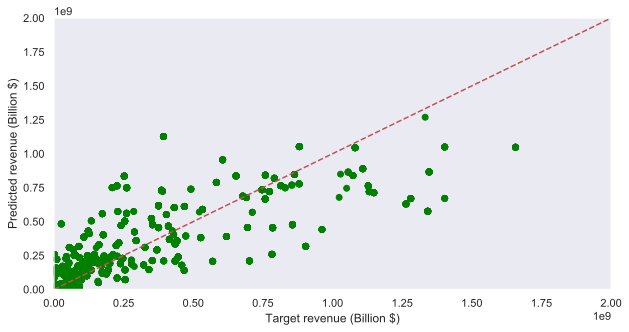

In [93]:
plt.figure(figsize=(10,5))
plt.scatter(y_val,val_set_pred,color='green')
x = np.linspace(0,5*10**9)
y = np.linspace(0,5*10**9)
plt.xlim(0,2*10**9)
plt.ylim(0,2*10**9)

plt.plot(x,y,'--',color='r')
plt.xlabel('Target revenue (Billion $)')
plt.ylabel('Predicted revenue (Billion $)')
plt.grid(False)

Text(0, 0.5, 'Error (100 Million $)')

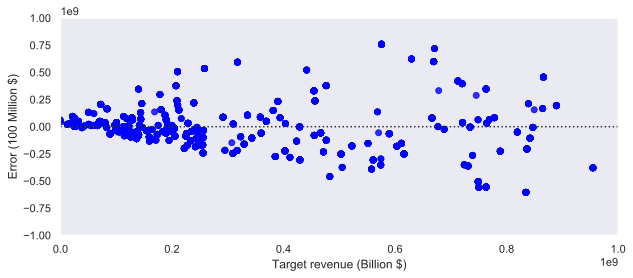

In [94]:
plt.figure(figsize=(10,4))
sns.residplot(val_set_pred,((y_val-val_set_pred)),color='blue')

plt.grid(False)
plt.xlim(0,10**9)
plt.ylim(-10**9,10**9)

plt.xlabel('Target revenue (Billion $)')
plt.ylabel('Error (100 Million $)')

Text(0, 0.5, 'Error (100 Million $)')

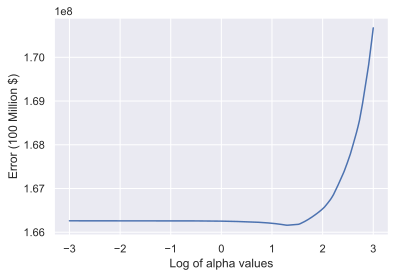

In [111]:
"""
We plot how the errors change for the different values of alpha, 
and see where alpha minimizes our error metric on the validation data. 
This value of alpha is the one we would select for our final model.
"""
plt.plot(np.log10(alphalist), err_vec_val)
plt.xlabel('Log of alpha values')
plt.ylabel('Error (100 Million $)')

In [96]:
np.min(err_vec_val)

166160605.66339558

In [97]:
alphalist[np.argmin(err_vec_val)]

20.49074689815846

In [98]:
ridge = Ridge(alpha = 20.5);
ridge.fit(X_train, y_train);

print(f'Ridge Regression R^2: {lm_reg.score(X_train, y_train):.3f}')


Ridge Regression R^2: 0.647


In [99]:
ridge = Ridge(alpha = 20.5);
ridge.fit(X_test, y_test);

print(f'Ridge Regression R^2: {lm_reg.score(X_test, y_test):.3f}')
X_set_pred = ridge.predict(X_test);

Ridge Regression R^2: 0.635


In [100]:
Xtest_set_pred = ridge.predict(X_test);

In [101]:
err_vec_val_1 = mae((y_test), (Xtest_set_pred));

In [102]:
(err_vec_val_1)

158455158.57387507

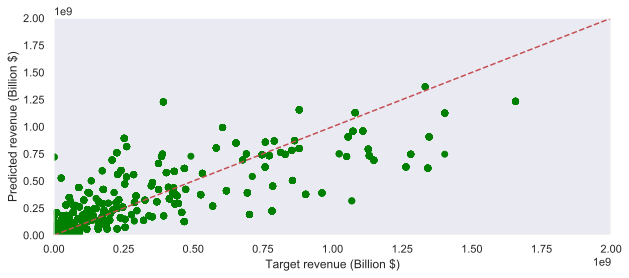

In [103]:
plt.figure(figsize=(10,4))
plt.scatter(y_test,X_set_pred,color='green')
x = np.linspace(0,5*10**9)
y = np.linspace(0,5*10**9)
plt.xlim(0,2*10**9)
plt.ylim(0,2*10**9)

plt.plot(x,y,'--',color='r')
plt.xlabel('Target revenue (Billion $)')
plt.ylabel('Predicted revenue (Billion $)')
plt.grid(False)
plt.savefig('TargetvsPredicted.png',dpi=600);

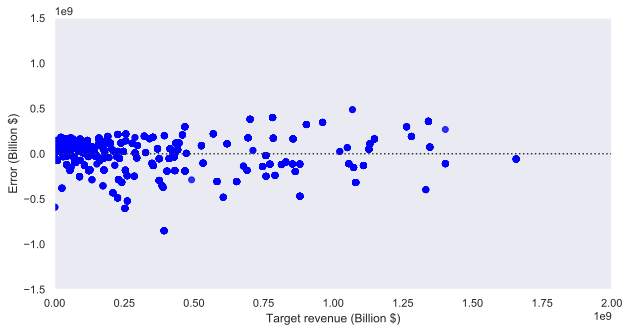

In [104]:
plt.figure(figsize=(10,5))
sns.residplot(y_test,y_test-Xtest_set_pred,color='blue')
plt.grid(False)
plt.xlim(0,2*10**9)
plt.ylim(-1.5*10**9,1.5*10**9)

plt.xlabel('Target revenue (Billion $)')
plt.ylabel('Error (Billion $)')
plt.savefig('Residuals.png',transparent=True,dpi=600);

### Factors that may have contributed to this inaccuracy in the model:

1. Incorrect assumptions

2. Less amount of data for the higher cumulative worldwide gross

3. Lack of features

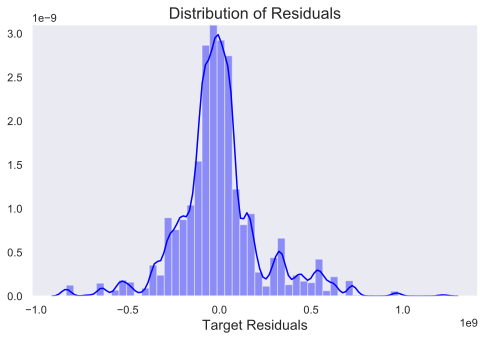

In [105]:
# Plot distribution of residuals
plt.figure(figsize=(8, 5))
sns.distplot(y_test-Xtest_set_pred,color='blue')
plt.xlabel('Target Residuals', size=14)
plt.title('Distribution of Residuals', size=16)
plt.grid(False)

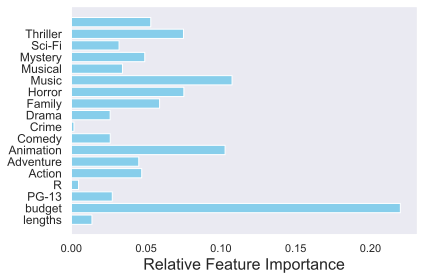

In [108]:
fig, ax = plt.subplots()
plt.barh(np.arange(len(lm.coef_) ),np.abs(lm.coef_[0:]) / (sum(np.abs(lm.coef_[0:]))),color='skyblue')
ax.set_yticks(np.arange(len(lm.coef_) - 1))
plt.xlabel('Relative Feature Importance', size=16)
sns.despine()
ax.set_yticklabels(['lengths', 'budget', 'PG-13', 'R', 'Action', 'Adventure', 'Animation', 'Comedy',
       'Crime', 'Drama', 'Family', 'Horror', 'Music', 'Musical', 'Mystery', 'Sci-Fi', 'Thriller', 'Western'],size=12)
plt.tight_layout()
plt.grid(False)
plt.savefig('FeatureImportance.png', dpi=600);

## Conclusion

In summary, we find that ridge regression performs the best in terms of predicting target variable with the features we used. Budget plays a dominant role in predicting the worldwide gross of a movie. Additionally, our model indicates that adventure, music, animation, thriller category movies would produce more worldwide gross in comparison to some genres of movies such as war, history, or fantasy. Furthermore, the model can be improved by taking more data points representing higher worldwide gross (>$500,000,000), and adding more features such as the inclusion of certain actors or directors in the movie which have higher popularity (say, in terms of awards).